##Nama: Artisa Bunga Syahputri
##NIM: 1301194007
##Kelas: IF-43-03

# DOWNLOAD FILE

In [2]:
#download data train 
!gdown --id 1sHCzDfNghSArcBQ1ipgZCilLX0nmMW8G
#download data test 
!gdown --id 1E0LCov3gpKcVh7Q-qUw5NlKAalkgOqtW

Downloading...
From: https://drive.google.com/uc?id=1sHCzDfNghSArcBQ1ipgZCilLX0nmMW8G
To: /content/kendaraan_train.xlsx
100% 14.3M/14.3M [00:00<00:00, 45.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1E0LCov3gpKcVh7Q-qUw5NlKAalkgOqtW
To: /content/kendaraan_test.xlsx
100% 2.13M/2.13M [00:00<00:00, 9.99MB/s]


#LIBRARY


In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
import random 
# library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns


#Read Data Pada Exel


In [4]:
df_train = pd.read_excel('kendaraan_train.xlsx')
#df_test = pd.read_excel('kendaraan_test.xlsx')

In [5]:
#tampilkan 5 data train teratas 
print(df_train.head())


   id Jenis_Kelamin  Umur  ...  Kanal_Penjualan  Lama_Berlangganan  Tertarik
0   1        Wanita  30.0  ...            152.0               97.0         0
1   2          Pria  48.0  ...             29.0              158.0         0
2   3           NaN  21.0  ...            160.0              119.0         0
3   4        Wanita  58.0  ...            124.0               63.0         0
4   5          Pria  50.0  ...             88.0              194.0         0

[5 rows x 12 columns]


#Data Train Exploration

In [6]:
#tampilkan 15 data train teratas 

df_train.head(10)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,< 1 Tahun,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
6,7,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0,1
7,8,Pria,23.0,NaN,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
9,10,NaN,54.0,1.0,29.0,0.0,> 2 Tahun,Pernah,88883.0,124.0,28.0,1


In [7]:
#melihat info data train 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [8]:
#ukuran data train 
df_train.shape

(285831, 12)

In [9]:
#lihat deskripsi data train 
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


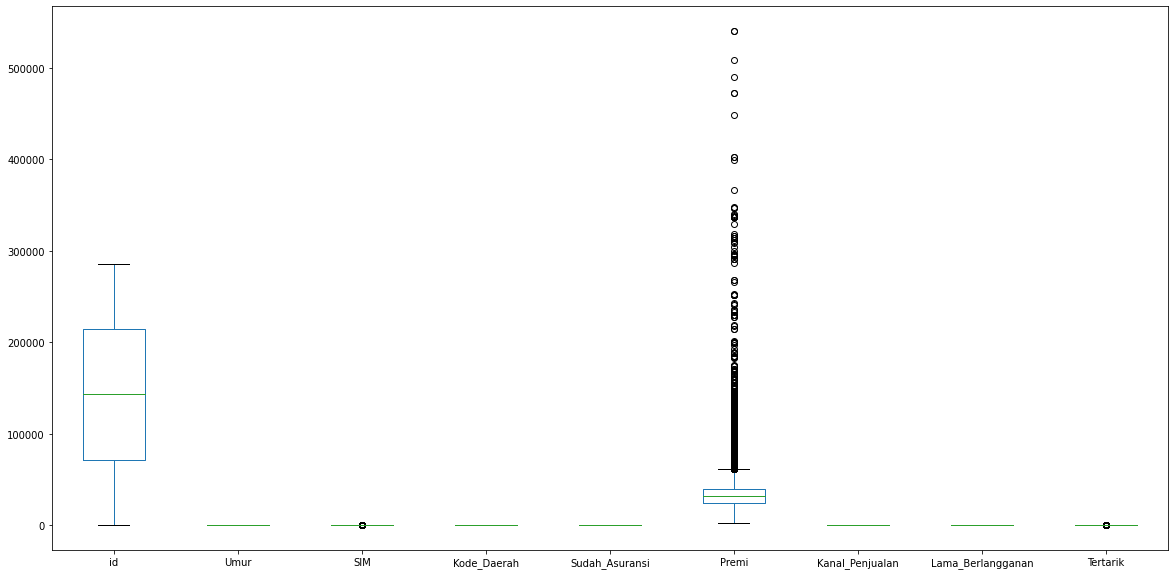

In [10]:
#melihat boxplot dari data train
df_train.plot(kind='box', figsize=(20, 10) )

#DATA PRE-PROCESSING

In [11]:
#menghilangkan outlier pada data premi 
#tentukan outlier 
Q1 = df_train['Premi'].quantile(0.25)
Q3 = df_train['Premi'].quantile(0.75)
IQR = Q3 - Q1

Max = Q3 + (1.5 * IQR)
Min = Q1 - (1.5 * IQR)

more_than = df_train['Premi'] > Max
lower_than = df_train['Premi'] < Min

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


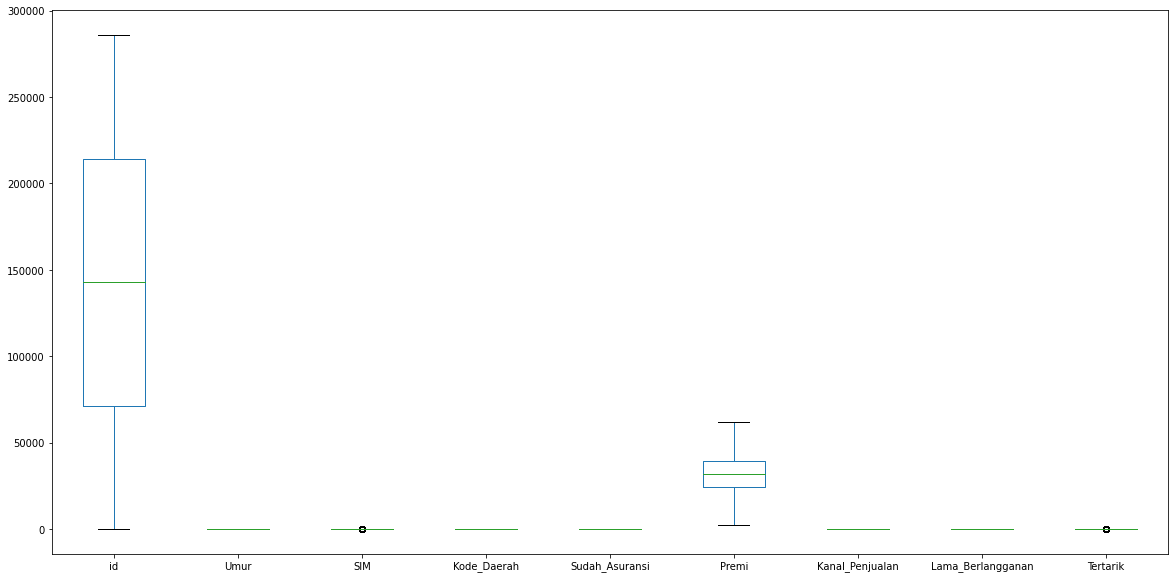

In [12]:
#hilangkan outlier
df_train['Premi'] = df_train['Premi'].mask(more_than, Max)
df_train['Premi'] = df_train['Premi'].mask(lower_than, Min)
df_train.plot(kind='box', figsize=(20, 10) )

In [13]:
#replace Umur_Kendaraan, Jenis_Kelamin, dan Kendaraan_Rusak to integer

df_train.replace(['< 1 Tahun', '1-2 Tahun', '> 2 Tahun'], [0,1,2], inplace=True)

df_train.replace(['Wanita', 'Pria'], [0,1], inplace= True)
df_train.replace(['Tidak', 'Pernah'], [0,1], inplace=True)

df_train.head(10)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.000,152.0,97.0,0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.000,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.000,160.0,119.0,0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.000,124.0,63.0,0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.000,88.0,194.0,0
5,6,1.0,21.0,1.0,35.0,1.0,0.0,0.0,22735.000,152.0,171.0,0
6,7,0.0,33.0,1.0,8.0,0.0,NaN,1.0,32435.000,124.0,215.0,1
7,8,1.0,23.0,NaN,28.0,1.0,0.0,0.0,26869.000,152.0,222.0,0
8,9,0.0,20.0,1.0,8.0,1.0,0.0,0.0,30786.000,160.0,31.0,0
9,10,NaN,54.0,1.0,29.0,0.0,2.0,1.0,61847.375,124.0,28.0,1


In [14]:
#cek missing value 
print(df_train.isnull().sum())

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


In [15]:
#drop missing value pada datatrain
X_train = df_train.dropna()

In [16]:
print(X_train.isna().sum())

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


In [17]:
#drop kolom ID
X_train.drop(['id', 'Tertarik'], inplace=True, axis= 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
X_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
5,1.0,21.0,1.0,35.0,1.0,0.0,0.0,22735.0,152.0,171.0
8,0.0,20.0,1.0,8.0,1.0,0.0,0.0,30786.0,160.0,31.0


In [233]:
#export dataframe setelah di preprocessing
#X_train.to_csv('kendaraan_after_preprocessed.csv', index=False)
#files.download('kendaraan_after_preprocessed.csv')

#Proses

In [20]:
#drop data yang hanya memiliki nilai 0 atau 1 
X_train.drop(['Jenis_Kelamin','SIM', 'Sudah_Asuransi', 'Kendaraan_Rusak'], inplace=True, axis= 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Menghitung Korelasi Antar Data 

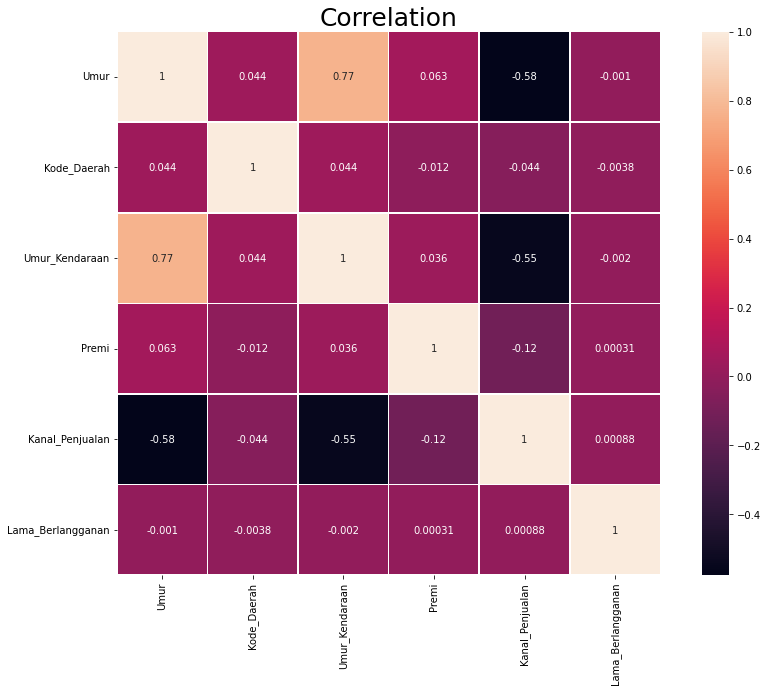

In [21]:
#lihat korelasi antar data

correlation_X = X_train.corr()

plt.figure(figsize=(15,10))

plt.title('Correlation', y=1, size=25)
#mask = np.triu(np.ones_like(correlation_X, dtype=bool))

sns.heatmap(correlation_X, annot= True, linewidths= .5, square=True)

plt.show()

In [22]:
corr_X = X_train.corr()

#Feature Selection

In [23]:
#ambil feature dengan korelasi yang tinggi 
#def selectCorr(data, corr_min):
#   col_corr = set()
#    corr_matrix = data.corr()
#    for i in range (len(corr_matrix.columns)):
#        for j in range (i) :
#            if (corr_matrix.iloc[i, j]) > corr_min:
#               col_name = corr_matrix.columns[i]
#               col_corr.add(col_name)
#    return col_corr

In [24]:
#get_feature = selectCorr(X_train, 0.005)
#get_feature

In [25]:
#drop feature dengan korelasi tinggi 
#X_train = X_train.drop(['Umur', 'Kode_Daerah','Umur_Kendaraan', 'Kanal_Penjualan' ], axis=1)

In [26]:
#mengambil data dengan korelasi terendah 
data_train = X_train[['Premi' , 'Lama_Berlangganan']]

In [27]:
data_train

,Premi,Lama_Berlangganan
0,28029.0,97.0
1,25800.0,158.0
3,2630.0,63.0
5,22735.0,171.0
8,30786.0,31.0
...,...,...
285826,25988.0,217.0
285827,44686.0,50.0
285828,49751.0,226.0
285829,30503.0,270.0


#Scaling

In [28]:
#melakukan sceling terhadap data train yang akan di gunakan 
scalling = MinMaxScaler()

data_train = pd.DataFrame(scalling.fit_transform(data_train))

data_train.columns = ['Premi', 'Lama_Berlangganan']
data_train

,Premi,Lama_Berlangganan
0,0.428911,0.301038
1,0.391270,0.512111
2,0.000000,0.183391
3,0.339512,0.557093
4,0.475469,0.072664
...,...,...
171063,0.394445,0.716263
171064,0.710197,0.138408
171065,0.795729,0.747405
171066,0.470690,0.899654


In [29]:
data_train.describe()

,Premi,Lama_Berlangganan
count,171068.000000,171068.000000
mean,0.463974,0.499146
std,0.261228,0.290182
min,0.000000,0.000000
25%,0.367118,0.245675
50%,0.489265,0.498270
75%,0.619637,0.750865
max,1.000000,1.000000


#Kmeans

In [99]:
#fungsi menghitung jarak data ke centroid menggunakan eucledian distance 
def euclidianDistance(instance1,instance2):
  distance = 0
  x=0
  for x in range(len(instance2)):
    distance += pow((instance1[x]-instance2[x]), 2 )
  return math.sqrt(distance)

In [113]:
# fungsi untuk menghitung apakan centroid sudah tetap atau belum 
def convergent(temp_centroids, centroids):
  if( np.array(centroids).all != np.array(temp_centroids).all):
    return False

  return True

In [129]:
def kMeans(K , max_iterasi,data):
  sum_square_error = 0

  # inisialisasi centroid 
  centroids = {i: data[random.randint(0, len(data))] for i in range(K)}
  # copy centroid sekarang untuk dibandingkan dengan centroid setelahnya
  temp_centroids = centroids.copy()

  for _ in range(max_iterasi):
    #mendefinisikan cluster 
    cluster = {i : [] for i in range(K)}
    sse = []

    #mencari nilai terdekat data dengan euclidiant distance dan masukan ke cluster 
    for x in data:
      jarak = [euclidianDistance(x, centroids[c]) for c in centroids]
      sse.append(np.min(jarak))

      cluster[jarak.index(min(jarak))].append(x)
    #merecompute centroid ulang dari setiap cluster dengan mean nya
    for i in cluster:
      centroids[i] = np.mean(cluster[i], axis= 0)
    #mengecek apakah centroid suda h stabil atau belum 
    if convergent(temp_centroids, centroids) : break
    #copy centroid sekarang untuk dibandingkan dengan centroid berikutnya 
    temp_centroids = centroids.copy()
  
  return centroids, cluster, sum(sse)




In [216]:
def clustering(cluster):
  data = []
  #memasukan data yang sudah dimodelkan ke dataframe 
  for key in cluster[1].keys():
    for i in cluster[1].get(key):
      data.append((i[0], i[1], key))

  
  data = pd.DataFrame(data)
  data.columns = ['Premi', 'Lama_Berlangganan', 'Cluster']

  return data



#Main Function 

In [249]:
sse_ = []
_cluster_ = []

data = np.array(data_train)
max_iterasi= 100
K = 3
for i in range(2,6):
  centroid, cluster, sse = kMeans(i,max_iterasi, data)
  print('jumlah cluster', i , centroid)

  sse_.append(sse)
  _cluster_.append([i,cluster, centroid])


jumlah cluster 2 {0: array([0.46402566, 0.75134836]), 1: array([0.46392235, 0.2486237 ])}
jumlah cluster 3 {0: array([0.01444214, 0.49925849]), 1: array([0.56278148, 0.75339629]), 2: array([0.56264523, 0.24662284])}
jumlah cluster 4 {0: array([0.56486388, 0.75151016]), 1: array([0.5650183 , 0.24858472]), 2: array([0.02072812, 0.75063704]), 3: array([0.02096267, 0.2487945 ])}
jumlah cluster 5 {0: array([0.56352937, 0.49817154]), 1: array([0.01576283, 0.24885994]), 2: array([0.563517  , 0.83523464]), 3: array([0.01552755, 0.75090506]), 4: array([0.56381716, 0.16322021])}


In [250]:
sse_

[44199.333062868616, 35949.74143507917, 32302.2591009317, 27992.202602753852]

#Elbow Method

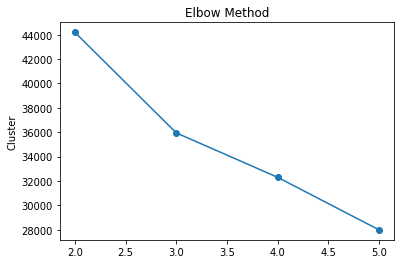

In [251]:
K = range(2,6)
plt.plot(K, sse_, marker = 'o')
plt.ylabel('sum_square_error')
plt.ylabel('Cluster')
plt.title('Elbow Method')

plt.show()

#Visualisasi Clustering 

In [253]:
def visualisasi_cluster(clusters):
    klasterisasi = []

    fig, axis = plt.subplots(2, 2, figsize=(15, 15))
    row = 0
    col = 0
   
    for cluster in clusters: 
        data = clustering(cluster)
        klasterisasi.append(data)

        #Set Warna
        colors = ['hotpink', '#88c999', 'magenta', 'cyan', 'green', 'pink']

        axis[col, row].set_title(f'{cluster[0]} Cluster', fontsize=14)

        
        for i in range(cluster[0]):
            axis[col][row].scatter(
                data['Lama_Berlangganan'][data['Cluster'] == i],
                data['Kanal_Penjualan'][data['Cluster'] == i],
                color=colors[i],
                label=f'Cluster {i}'
            )

            axis[col][row].scatter(cluster[2][i][0], cluster[2][i][1], color='k', marker='P')

        axis[col][row].scatter(cluster[2][0][0], cluster[2][0][1], color='k', label="Centroids", marker='P')
                            
        axis[col][row].legend(loc='best', bbox_to_anchor=(1, 0.5))

        row += 1
        if row == 2: row = 0
        if row == 0 and col == 0: 
            row = 0
            col = 1 

    for ax in axis.flat:
        ax.set(xlabel='Lama_Berlangganan', ylabel='Kanal Penjualan')
        ax.label_outer()

    plt.subplots_adjust(wspace=0.3, hspace=0.1)
    plt.show()

    return klasterisasi

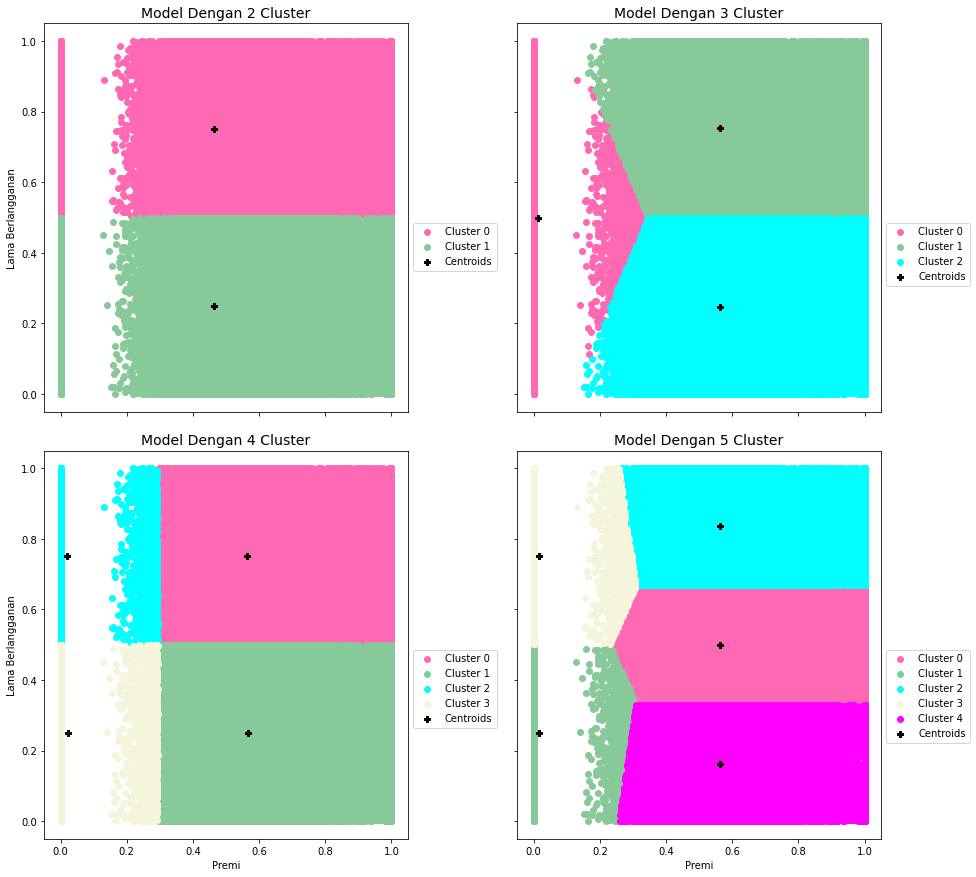

In [254]:
clusterize = visualize_cluster(_cluster_)

#Pengecekan Menggunakan Silhouette Score 

In [255]:
from sklearn.metrics import silhouette_score 

for i, cluster in enumerate(clusterize):
    score = silhouette_score(cluster[['Premi', 'Lama_Berlangganan']], cluster['Cluster'])
    print(f'Cluster-{i+3}, Silhouette Score = {score}')
    

Cluster-3, Silhouette Score = 0.39131843815495393
Cluster-4, Silhouette Score = 0.45339244990336675
Cluster-5, Silhouette Score = 0.4398033619676446
Cluster-6, Silhouette Score = 0.39535527959564326
